# Chi-square Testing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from math import sqrt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

#### Q1. Dairies would like to know whether the sales of milk are distributed uniformly over a year so they can plan for milk production and storage. A uniform distribution means that the frequencies are the same in all categories. In this situation, the producers are attempting to determine whether the amounts of milk sold are the same for each month of the year. They ascertain the number of gallons of milk sold by sampling one large supermarket each month during a year, obtaining the following data. Use .01 to test whether the data fit a uniform distribution.
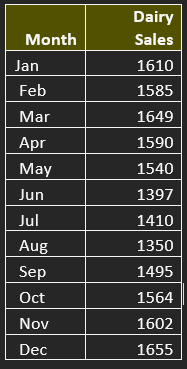

In [2]:
Milk_Sales = pd.DataFrame({'Month': ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul" , "Aug", "Sep", "Oct", "Nov", "Dec"],
                         'Sales': [1610, 1585, 1649, 1590, 1540, 1397, 1410, 1350, 1495, 1564, 1602, 1655]})

Milk_Sales["Expected_Sales"] = Milk_Sales.Sales.mean()

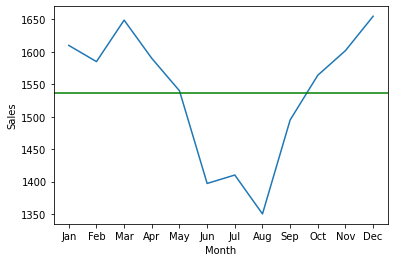

In [3]:
sns.lineplot(data=Milk_Sales, x='Month', y='Sales').axhline( Milk_Sales.Sales.mean(), color="green")

In [4]:
chissq_stat = sum((Milk_Sales.Sales - Milk_Sales.Expected_Sales)**2/Milk_Sales.Expected_Sales)
stats.chi2.sf(chissq_stat, df = 11)

1.78545252783034e-11

In [5]:
stats.chisquare(Milk_Sales["Sales"])

Power_divergenceResult(statistic=74.37583346885673, pvalue=1.78545252783034e-11)

#### Q2. Quite often in the business world, random arrivals are Poisson distributed. This distribution is characterized by an average arrival rate, λ, per some interval. Suppose a teller supervisor believes the distribution of random arrivals at a local bank is Poisson and sets out to test this hypothesis by gathering information. The following data represent a distribution of frequency of arrivals during 1-minute  intervals at the bank. Use α = .05 to test these data in an effort to  determine whether they are Poisson distributed.
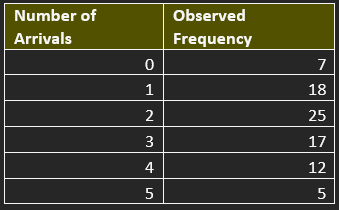


In [6]:
## Number of Arrivals 
Arrivals_Freq = pd.DataFrame({"Number_Arrivals": [0,1,2,3,4,5],
                                 "Observed_freq": [7,18,25,17,12,5]})


Lamda = sum(Arrivals_Freq["Number_Arrivals"] * Arrivals_Freq["Observed_freq"]) / sum(Arrivals_Freq["Observed_freq"])

In [7]:
stats.poisson.cdf(0, Lamda)
stats.poisson.cdf(1, Lamda)

0.10170139230422684

0.3341617175710309

In [8]:
Arrivals_Freq["Cum_Prob"] = stats.poisson.cdf(Arrivals_Freq["Number_Arrivals"], Lamda)

Arrivals_Freq["Exp_Prob"] =  Arrivals_Freq["Cum_Prob"] - Arrivals_Freq["Cum_Prob"].shift(1)
Arrivals_Freq["Exp_Prob"].fillna(Arrivals_Freq.loc[Arrivals_Freq["Exp_Prob"].isna(), "Cum_Prob"][0], inplace=True)
Arrivals_Freq["Exp_Freq"] = sum(Arrivals_Freq["Observed_freq"]) * Arrivals_Freq["Exp_Prob"]

In [9]:
Chisquarestat = sum((Arrivals_Freq["Observed_freq"] - Arrivals_Freq["Exp_Freq"])**2/Arrivals_Freq["Exp_Freq"])

stats.chi2.cdf(Chisquarestat,  4)
stats.chi2.cdf(Chisquarestat,  4)
stats.chi2.ppf(0.95, 4)

0.1433878724614141

0.1433878724614141

9.487729036781154